In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import pandas as pd

#pd.read_csv('/content/drive/My Drive/Bahman.Group.csv')
#pd.read_csv('/content/drive/My Drive/Zamyad.csv')
#pd.read_csv('/content/drive/My Drive/Nirou.Moharreke.csv')
#pd.read_csv('/content/drive/My Drive/S_Pars.Khodro.csv')
#pd.read_csv('/content/drive/My Drive/S_IranKhodroDiesel.csv')

!pip install unidecode
!pip install jdatetime
!pip install khayyam
!pip install openpyxl==3.0.0
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from unidecode import unidecode
import jdatetime
from khayyam import *
from sklearn.preprocessing import LabelEncoder

Mounted at /content/drive
     |████████████████████████████████| 235 kB 12.2 MB/s 
     |████████████████████████████████| 46 kB 3.1 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74591 sha256=103478fbf3cb2a3d5b0086be975a85fee22431046b69e3da7301b922641655dd
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam


In [ ]:
#!pip install openpyxl


import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/social/khavar.csv')
hashtag_df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/social/khavar.xlsx"))
hashtag_df.head()




,پایگاه داده,منتشر کننده,نام کاربری,لینک داشبورد,لینک اصلی,زمان انتشار,عنوان,خلاصه,متن,تعداد بازتاب,تعداد نمایش/واکنش,تعداد کامنت(برای خبر),تعداد لایک(برای کامنت و توییت),تعداد دیسلایک(برای کامنت),تعداد ریتوییت(برای توییتر),سنتیمنت اتوماتیک
0,telegram,stock & options,sstockoptions,/record/70998237,https://telegram.me/sstockoptions/17169,۱۴:۵۸:۲۳ ۱۴۰۰/۱۱/۱۰,NaN,خلاصه تحلیل #ارفع\nگزارش #صورت_سود_و‌_زیان و \...,خلاصه تحلیل #ارفع\nگزارش #صورت_سود_و‌_زیان و \...,1,140,0,0,0,0,خنثی
1,telegram,Upterend || روند صعودی,Upterend,/record/70998179,https://telegram.me/Upterend/5937,۱۳:۰۲:۳۷ ۱۴۰۰/۱۱/۱۰,NaN,#عملکرد_کانال_خصوصی در یک روز خاص بازار که شاخ...,#عملکرد_کانال_خصوصی در یک روز خاص بازار که شاخ...,1,1967,0,0,0,0,مثبت
2,telegram,رویانگر بورس💫,rooya_negar,/record/70998189,https://telegram.me/rooya_negar/1165771,۱۱:۰۰:۳۹ ۱۴۰۰/۱۱/۱۰,NaN,دوستانی که خیلی توضررن میتونن سهم خاور بخرن.,دوستانی که خیلی توضررن میتونن سهم خاور بخرن.,1,0,0,0,0,0,مثبت
3,telegram,Boursebase,boursebases,/record/70998145,https://telegram.me/boursebases/7570,۱۰:۴۸:۳۷ ۱۴۰۰/۱۱/۱۰,NaN,در نماد #خاور فروشنده نباشید. قرار شد بلندمدتی...,در نماد #خاور فروشنده نباشید. قرار شد بلندمدتی...,1,86,0,0,0,0,مثبت
4,telegram,هزار تحلیل,NaN,/record/70998144,https://telegram.me/c/1247075296/26164,۱۰:۴۳:۲۹ ۱۴۰۰/۱۱/۱۰,NaN,وضعیت بازار در این لحظه \n🔳 ارزش معاملات : \n▫...,وضعیت بازار در این لحظه \n🔳 ارزش معاملات : \n▫...,1,1955,0,0,0,0,خنثی


In [ ]:
new_hashtag = pd.DataFrame(index=range(0,len(hashtag_df)),columns=['Date','view_count'])



In [ ]:
for i in range(len(hashtag_df)):
  a = hashtag_df['زمان انتشار'][i]
  a = unidecode(a)
  # print(a)
  b=a.split()[1]
  # print(b)
  new_hashtag["Date"][i] = JalaliDatetime.strptime(b, '%Y/%m/%d').todate()
  new_hashtag['view_count'][i] = hashtag_df['تعداد نمایش/واکنش'][i] 

In [ ]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

In [ ]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

j = 0
for i in range(len(new_hashtag)):
  if i == j == 0:
    # _date = new_hashtag['Date'][i]
    # _view_count = new_hashtag['view_count'][i]
    # tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'])
    # aggregated_hashtag_df.append(tmp_df)
    aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]
    # print(len(aggregated_hashtag_df))
  elif new_hashtag['Date'][i] == new_hashtag['Date'][i - 1]:
    # print("j: ", j)
    aggregated_hashtag_df['view_count'][j] += new_hashtag['view_count'][i]
  else:
    j += 1
    _date = new_hashtag['Date'][i]
    _view_count = new_hashtag['view_count'][i]
    tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'], index=[j])
    aggregated_hashtag_df=aggregated_hashtag_df.append(tmp_df)
    # print("len: ", len(aggregated_hashtag_df))
    # aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    # aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]



In [ ]:
aggregated_hashtag_df.index = aggregated_hashtag_df['Date']
# print(aggregated_hashtag_df['Date'][1])

In [ ]:
aggregated_hashtag_df.head()

,Date,view_count
Date,,
2022-01-30,2022-01-30,29057
2022-01-29,2022-01-29,99276
2022-01-28,2022-01-28,15
2022-01-27,2022-01-27,1173
2022-01-26,2022-01-26,44665


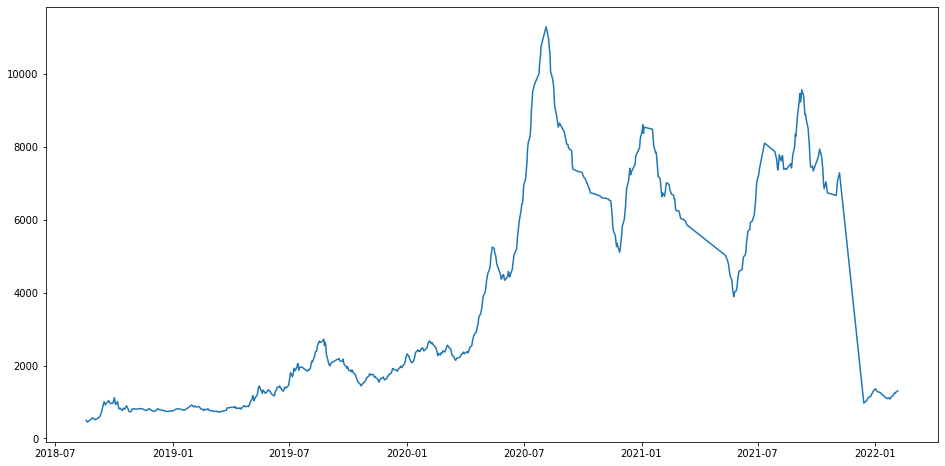

In [ ]:
df["Date"]=pd.to_datetime(df["<DTYYYYMMDD>"],format="%Y%m%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["<CLOSE>"],label='Close Price history')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close','Open','High','Vol','Low'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["<CLOSE>"][i]
    new_dataset["Open"][i]=data["<OPEN>"][i]
    new_dataset["High"][i]=data["<HIGH>"][i]
    new_dataset["Vol"][i]=data["<VOL>"][i]
    new_dataset["Low"][i]=data["<LOW>"][i]



In [ ]:
tmp_dataset=new_dataset.copy()
tmp_dataset
tmp_dataset['Date'] = pd.to_datetime(tmp_dataset['Date']).dt.date
#tmp_dataset
tmp_dataset.set_index('Date', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low
Date,,,,,
2018-08-18,495.0,505.0,495.0,4836358,495.0
2018-08-20,450.0,495.0,453.0,39462466,450.0
2018-08-25,514.0,450.0,539.0,13026046,481.0
2018-08-27,563.0,514.0,570.0,36977388,534.0
2018-08-29,551.0,563.0,555.0,12638055,539.0
...,...,...,...,...,...
2022-01-30,1221.0,1178.0,1236.0,322957250,1186.0
2022-01-31,1248.0,1221.0,1257.0,320540837,1194.0
2022-02-01,1237.0,1248.0,1285.0,268724970,1211.0


In [ ]:

idx = pd.date_range('2003-05-07', '2022-02-05')
tmp_dataset = tmp_dataset.reindex(idx, fill_value=0)
for i in range(len(tmp_dataset)):
  if tmp_dataset['Close'][i] == 0:
    tmp_dataset['Close'][i] = tmp_dataset['Close'][i-1]
tmp_dataset

,Close,Open,High,Vol,Low
2003-05-07,1306.0,0,0,0,0
2003-05-08,1306.0,0,0,0,0
2003-05-09,1306.0,0,0,0,0
2003-05-10,1306.0,0,0,0,0
2003-05-11,1306.0,0,0,0,0
...,...,...,...,...,...
2022-02-01,1237.0,1248.0,1285.0,268724970,1211.0
2022-02-02,1269.0,1237.0,1274.0,194692469,1206.0
2022-02-03,1269.0,0,0,0,0
2022-02-04,1269.0,0,0,0,0


In [ ]:
tmp_dataset.index.name = 'Date'
tmp_dataset.tail(10)
# aggregated_hashtag_df = aggregated_hashtag_df.drop(['Date'], axis=1)
# aggregated_hashtag_df.head()

,Close,Open,High,Vol,Low
Date,,,,,
2022-01-27,1144.0,0,0,0,0
2022-01-28,1144.0,0,0,0,0
2022-01-29,1178.0,1144.0,1178.0,111752423,1166.0
2022-01-30,1221.0,1178.0,1236.0,322957250,1186.0
2022-01-31,1248.0,1221.0,1257.0,320540837,1194.0
2022-02-01,1237.0,1248.0,1285.0,268724970,1211.0
2022-02-02,1269.0,1237.0,1274.0,194692469,1206.0
2022-02-03,1269.0,0,0,0,0
2022-02-04,1269.0,0,0,0,0


In [ ]:
aggregated_hashtag_df.index.astype = 'datetime64[ns]'
tmp_dataset.index.astype = 'datetime64[ns]'


In [ ]:
tmp_dataset.tail(10)


,Close,Open,High,Vol,Low
Date,,,,,
2022-01-27,1144.0,0,0,0,0
2022-01-28,1144.0,0,0,0,0
2022-01-29,1178.0,1144.0,1178.0,111752423,1166.0
2022-01-30,1221.0,1178.0,1236.0,322957250,1186.0
2022-01-31,1248.0,1221.0,1257.0,320540837,1194.0
2022-02-01,1237.0,1248.0,1285.0,268724970,1211.0
2022-02-02,1269.0,1237.0,1274.0,194692469,1206.0
2022-02-03,1269.0,0,0,0,0
2022-02-04,1269.0,0,0,0,0


In [ ]:
aggregated_hashtag_df.tail()

,Date,view_count
Date,,
2019-03-25,2019-03-25,38516
2019-03-24,2019-03-24,2787
2019-03-23,2019-03-23,1856
2019-03-22,2019-03-22,4211
2019-03-21,2019-03-21,1028


In [ ]:
inner_merged_total = pd.merge(tmp_dataset, aggregated_hashtag_df, left_index=True, right_index=True)
inner_merged_total
del inner_merged_total['Date']
inner_merged_total


,Close,Open,High,Vol,Low,view_count
Date,,,,,,
2019-03-21,748.0,0,0,0,0,1028
2019-03-22,748.0,0,0,0,0,4211
2019-03-23,748.0,0,0,0,0,1856
2019-03-24,748.0,0,0,0,0,2787
2019-03-25,772.0,748.0,794.0,13367008,740.0,38516
...,...,...,...,...,...,...
2022-01-26,1144.0,1111.0,1144.0,54847284,1136.0,44665
2022-01-27,1144.0,0,0,0,0,1173
2022-01-28,1144.0,0,0,0,0,15


In [ ]:
merged_df = inner_merged_total.copy()

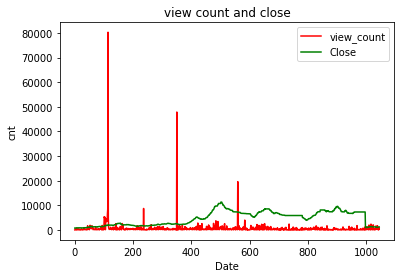

In [ ]:
xx = merged_df.index
#yy1 = np.log(merged_df['view_count'])
yy1 = merged_df['view_count']/10
yy2 = merged_df['Close']
#print(yy2)
#print(yy1)
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
  

  
# Plotting both the curves simultaneously
plt.plot(xx, yy1/10, color='r', label='view_count')
plt.plot(xx, yy2, color='g', label='Close')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.ylabel("cnt")
plt.title("view count and close")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:
import numpy as np
import pandas as pd

merged_df['Date'] = merged_df.index
merged_df.reset_index(drop=True, inplace=True)
merged_df['period'] = merged_df.index
merged_df.set_index('period', inplace = True)
merged_df

,Close,Open,High,Vol,Low,view_count,Date
period,,,,,,,
0,748.0,0,0,0,0,1028,2019-03-21
1,748.0,0,0,0,0,4211,2019-03-22
2,748.0,0,0,0,0,1856,2019-03-23
3,748.0,0,0,0,0,2787,2019-03-24
4,772.0,748.0,794.0,13367008,740.0,38516,2019-03-25
...,...,...,...,...,...,...,...
1040,1144.0,1111.0,1144.0,54847284,1136.0,44665,2022-01-26
1041,1144.0,0,0,0,0,1173,2022-01-27
1042,1144.0,0,0,0,0,15,2022-01-28


In [ ]:
def plot_2(df1,df2,col):
    xx = df1.index
    yy1 = df1[col]
    yy2 = df2[col]

    # Plotting both the curves simultaneously
    plt.plot(xx, yy1, color='r', label="Close")
    plt.plot(xx, yy2, color='g', label="view_count")
      
    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("period")
    plt.ylabel("cnt")
    plt.title(col)
      
    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()

    # To load the display window
    plt.show()

In [ ]:
new_data = merged_df
copy_data = new_data.copy()

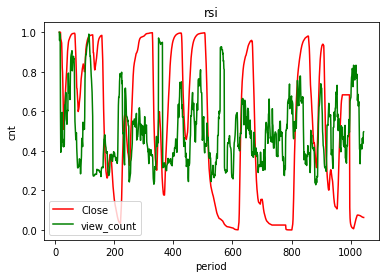

,Close,Open,High,Vol,Low,view_count,Date,rsi
period,,,,,,,,
0,748.0,0,0,0,0,1028,2019-03-21,NaN
1,748.0,0,0,0,0,4211,2019-03-22,NaN
2,748.0,0,0,0,0,1856,2019-03-23,NaN
3,748.0,0,0,0,0,2787,2019-03-24,NaN
4,772.0,748.0,794.0,13367008,740.0,38516,2019-03-25,NaN
...,...,...,...,...,...,...,...,...
1040,1144.0,1111.0,1144.0,54847284,1136.0,44665,2022-01-26,0.464262
1041,1144.0,0,0,0,0,1173,2022-01-27,0.437862
1042,1144.0,0,0,0,0,15,2022-01-28,0.437105


In [ ]:
def rsi(data, periods=14, close_col='<CLOSE>'):
    data['rsi_u'] = 0.
    data['rsi_d'] = 0.
    data['rsi'] = 0.

    for index, row in data.iterrows():
        if index >= periods:

            prev_close = data.at[index - periods, close_col]
            if prev_close < row[close_col]:
                data.at[index, 'rsi_u'] = row[close_col] - prev_close
            elif prev_close > row[close_col]:
                data.at[index, 'rsi_d'] = prev_close - row[close_col]

    data['rsi'] = data['rsi_u'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean() / (
            data['rsi_u'].ewm(ignore_na=False, min_periods=0, com=periods, adjust=True).mean() + data['rsi_d'].ewm(
        ignore_na=False, min_periods=0, com=periods, adjust=True).mean())

    data = data.drop(['rsi_u', 'rsi_d'], axis=1)

    return data


rsi_data_close = rsi(copy_data.copy(),periods=14, close_col='Close')
rsi_data_view_count = rsi(copy_data.copy(),periods=14, close_col='view_count')

plot_2(rsi_data_close,rsi_data_view_count,'rsi')
rsi_data_view_count

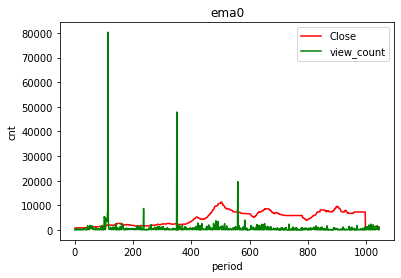

,Close,Open,High,Vol,Low,view_count,Date,ema0
period,,,,,,,,
0,748.0,0,0,0,0,1028,2019-03-21,748.0
1,748.0,0,0,0,0,4211,2019-03-22,748.0
2,748.0,0,0,0,0,1856,2019-03-23,748.0
3,748.0,0,0,0,0,2787,2019-03-24,748.0
4,772.0,748.0,794.0,13367008,740.0,38516,2019-03-25,772.0
...,...,...,...,...,...,...,...,...
1040,1144.0,1111.0,1144.0,54847284,1136.0,44665,2022-01-26,1144.0
1041,1144.0,0,0,0,0,1173,2022-01-27,1144.0
1042,1144.0,0,0,0,0,15,2022-01-28,1144.0


In [ ]:
def ema(data, period=0, column='<CLOSE>', ema_column="ema"):
    data[ema_column + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period,
                                                      adjust=True).mean()

    return data


ema_data_close = ema(copy_data.copy(),0,column='Close',ema_column="ema")
ema_data_view_count = ema(copy_data.copy(),0,column='view_count',ema_column="ema")
ema_data_view_count['ema0'] = ema_data_view_count['ema0']/100
plot_2(ema_data_close,ema_data_view_count,'ema0')
ema_data_close


In [ ]:
ema_data_close

,Close,Open,High,Vol,Low,view_count,Date,ema0
period,,,,,,,,
0,748.0,0,0,0,0,1028,2019-03-21,748.0
1,748.0,0,0,0,0,4211,2019-03-22,748.0
2,748.0,0,0,0,0,1856,2019-03-23,748.0
3,748.0,0,0,0,0,2787,2019-03-24,748.0
4,772.0,748.0,794.0,13367008,740.0,38516,2019-03-25,772.0
...,...,...,...,...,...,...,...,...
1040,1144.0,1111.0,1144.0,54847284,1136.0,44665,2022-01-26,1144.0
1041,1144.0,0,0,0,0,1173,2022-01-27,1144.0
1042,1144.0,0,0,0,0,15,2022-01-28,1144.0


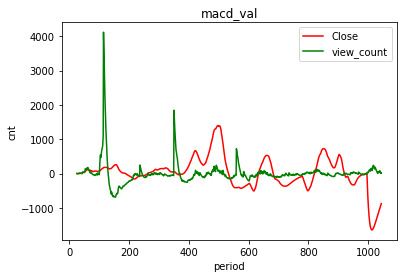

,Close,Open,High,Vol,Low,view_count,Date,macd_val,macd_signal_line
period,,,,,,,,,
0,748.0,0,0,0,0,1028,2019-03-21,NaN,NaN
1,748.0,0,0,0,0,4211,2019-03-22,NaN,NaN
2,748.0,0,0,0,0,1856,2019-03-23,NaN,NaN
3,748.0,0,0,0,0,2787,2019-03-24,NaN,NaN
4,772.0,748.0,794.0,13367008,740.0,38516,2019-03-25,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1040,1144.0,1111.0,1144.0,54847284,1136.0,44665,2022-01-26,-989.224248,-1189.641694
1041,1144.0,0,0,0,0,1173,2022-01-27,-960.912843,-1166.768808
1042,1144.0,0,0,0,0,15,2022-01-28,-933.009505,-1143.392878


In [ ]:
def macd(data, period_long=26, period_short=12, period_signal=9, column='<CLOSE>',
         ema_column="ema", macd_val_column="macd_val", macd_signal_line_column="macd_signal_line"):
    remove_cols = []
    if not ema_column + str(period_long) in data.columns:
        data = ema(data, period_long, column, ema_column=ema_column)
        remove_cols.append(ema_column + str(period_long))

    if not ema_column + str(period_short) in data.columns:
        data = ema(data, period_short, column, ema_column=ema_column)
        remove_cols.append(ema_column + str(period_short))

    data[macd_val_column] = data[ema_column + str(period_short)] - data[ema_column + str(period_long)]
    data[macd_signal_line_column] = data[macd_val_column].ewm(ignore_na=False, min_periods=0, com=period_signal,
                                                              adjust=True).mean()

    data = data.drop(remove_cols, axis=1)

    return data

copy_data = new_data.copy()
macd_data = macd(copy_data.copy(),26,12,9, column='Close',ema_column="ema", macd_val_column="macd_val", macd_signal_line_column="macd_signal_line")
macd_data



macd_data_close = macd(copy_data.copy(),26,12,9, column='Close',ema_column="ema", macd_val_column="macd_val", macd_signal_line_column="macd_signal_line")
macd_data_view_count =macd(copy_data.copy(),26,12,9, column='view_count',ema_column="ema", macd_val_column="macd_val", macd_signal_line_column="macd_signal_line")
macd_data_view_count['macd_val'] /= 100
plot_2(macd_data_close,macd_data_view_count,'macd_val')

macd_data_close